##### <a id='top'></a>

# Homework 4: Confidence intervals and other things
***

**Name**: 

***

This assignment is due on Moodle by **11:59 PM on Friday November 8**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
%matplotlib inline

---

<a id='p1'></a>
[Back to top](#top)

### [30 points] Problem 1 - Are sea-levels changing?

You have been contacted by the local government of New York City, to assess whether there is statistical evidence for sea-level rise in the area. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file (posted on Canvas).

In this problem, you will:
1. practice calculating confidence intervals, 
1. practice wrangling a real-life data set into a form where you can actually compute these confidence intervals, because life will rarely be so kind as to simply hand you a nicely packaged and cleaned set of data, and
1. save NYC and the Statue of Liberty from a watery fate?

In [2]:
# Local and web paths to the data; pick which works for you.
filepath = "sealevel_newyork.csv"

dfSL = pd.read_csv(filepath, header=None)
dfSL.rename(columns={0 : 'Year', 1 : 'Month', 2 : 'Day', 3 : 'SL'}, inplace=True)
dfSL.head(50)

,Year,Month,Day,SL
0,1920,6,2,1593
1,1920,6,3,1605
2,1920,6,4,1617
3,1920,6,5,1779
4,1920,6,6,1722
5,1920,6,7,1594
6,1920,6,8,1639
7,1920,6,9,1699
8,1920,6,10,1690
9,1920,6,11,1622


**Part A:**  Write a function `clean_data` to:
1. take in a single argument of a raw sea level data frame (e.g., `dfSL` above),
2. compute the fill-value used to replace missing sea level (SL) data (**not** hard-coded!),
3. use the Pandas `DataFrame.dropna` method to remove all missing rows of data, 
4. select only the data point on the second day of each month, and
4. return a cleaned Pandas data frame.

Use your shiny new function to clean the `dfSL` data frame and save the results in a new data frame.

There is a very specific reason to sample only one daily data point per month. We will talk about it later.

In [123]:
# 1
def clean_data(df):
    mvt = -20
    dfClean = df.where(df['SL'] > mvt)
    dfClean = dfClean.dropna()
    dfClean = dfClean.loc[dfClean['Day'] == 2]
    return dfClean

dfClean = clean_data(dfSL)
dfClean.head(50)

,Year,Month,Day,SL
0,1920.0,6.0,2.0,1593.0
30,1920.0,7.0,2.0,1710.0
61,1920.0,8.0,2.0,1662.0
92,1920.0,9.0,2.0,1585.0
122,1920.0,10.0,2.0,1521.0
153,1920.0,11.0,2.0,1704.0
183,1920.0,12.0,2.0,1398.0
214,1921.0,1.0,2.0,1686.0
245,1921.0,2.0,2.0,1530.0
273,1921.0,3.0,2.0,1541.0


In [4]:
len(dfClean)

1003

**Part B:**  Plot the cleaned time series of sea levels. Be sure to label your axes, including units. The UHSLC data portal includes a link to the metadata accompanying our data set; if you are not sure about units, that would be a good place to start looking. For the $x$-axis, place the $x$ tick marks on January 1 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 


Text(0.5, 1.0, 'Monthly Sea Levels from 1920 to 2015')

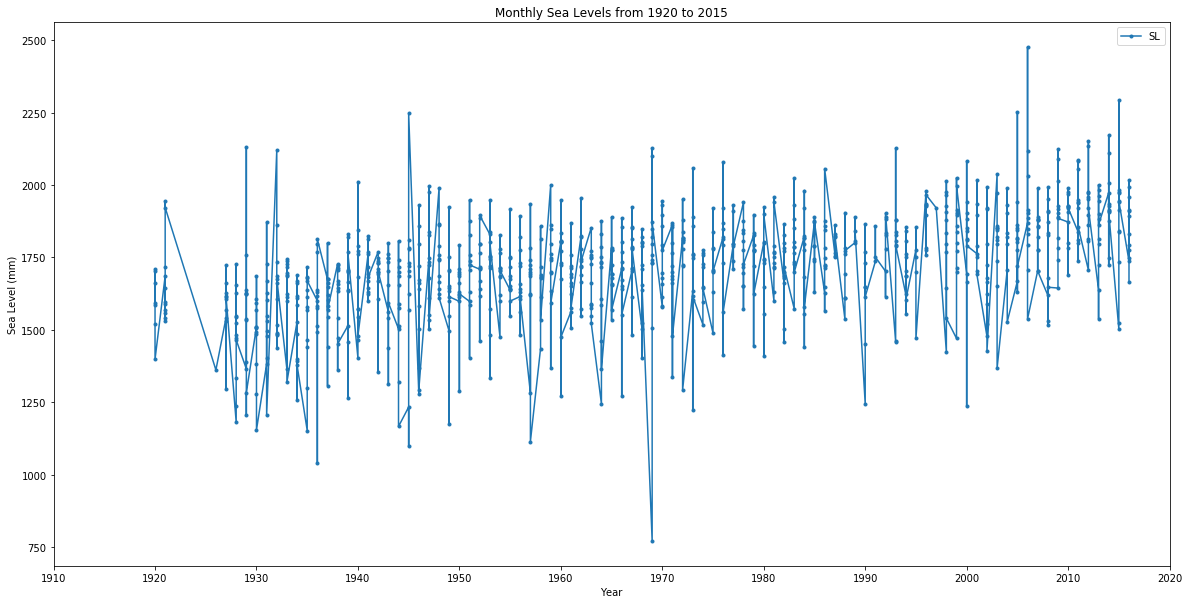

In [130]:
dfClean['GraphIndex'] = dfClean['Year']
fig, ax = plt.subplots(1,1, figsize=(20,10))
dfClean.plot(x='GraphIndex', y='SL', marker='.', ax=ax)

#labeling
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (mm)")
ax.set_xticks(range(1910, 2030, 10))
ax.set_title("Monthly Sea Levels from 1920 to 2015")

**Part C:** Use your cleaned sea levels data frame to create two new Pandas data frames or series:
1. one object to contain the sea levels between (and including) the years 1986 and 1995, and
2. another object to contain the sea levels between (and including) the years 2006 and 2015.

Then, create a single-panel figure that includes density histograms of each of the two decades of sea levels. Be sure to label everything appropriately.

Finally, based on the data in front of you, formulate and state a hypothesis about how the mean sea level in the decade 2006-2015 compares to the mean sea level in the decade 1986-1995.

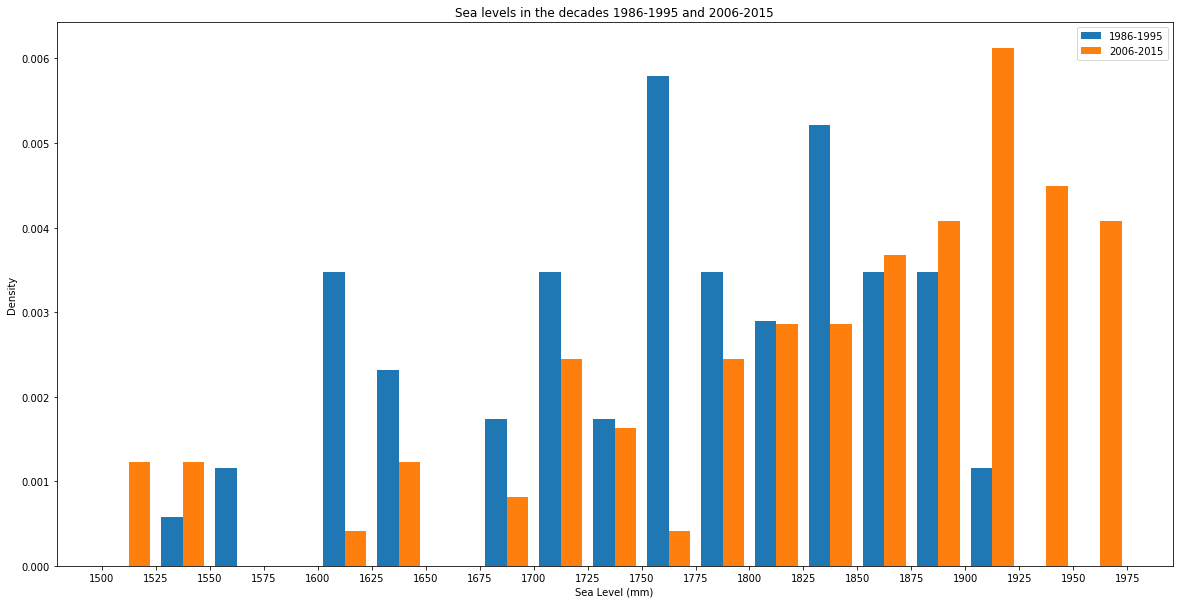

In [131]:
df86_95 = dfClean.loc[(dfClean['Year']>1985) & (dfClean['Year']<1996)]
df06_15 = dfClean.loc[(dfClean['Year']>2005) & (dfClean['Year']<2016)]
fig, ax = plt.subplots(1,1,figsize=(20,10))
plt.hist([df86_95['SL'], df06_15['SL']], label=['1986-1995', '2006-2015'], rwidth=0.8, bins = range(1500, 2000, 25), density = True)
plt.xticks(np.arange(1500, 2000, 25), range(1500, 2000, 25))

ax.set_title("Sea levels in the decades 1986-1995 and 2006-2015")
ax.set_xlabel('Sea Level (mm)')
ax.set_ylabel('Density')
plt.legend()

**Hypothesis**:

Base off the histogram we can make a hypothesis that the mean sea level for the decade of 2006 to 2015 was higher than the mean sea level for the decade 1986 to 1995.

$H_0: u_{past} >= u_{present}$ (greater than or equal to)

$H_1: u_{past} < u_{present}$

**Part D:** Compute a 99.9% confidence interval for each of (1) the mean sea level in the 1986-1995 decade ($\mu_{1986-1995}$) and (2) the mean sea level in the 2006-2015 decade ($\mu_{2006-2015}$).  You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

Based on these two confidence intervals, do you think there is sufficient evidence to conclude that there is or is not a significant difference in the mean sea level between 1986-1995 and 2006-2015? Justify your answer. 

In [132]:
#Math for 86 - 95
std86 = df86_95['SL'].std()
print("s for 86-95:",std86)
xbar86 = df86_95['SL'].mean()
print("mean for 86-95:",xbar86)
n86 = len(df86_95)
print("n =",n86)
# alpha = 0.001
z = stats.norm.ppf(0.9995)
# confidence interval calculations
lower = xbar86 - z*std86/np.sqrt(n86)
upper = xbar86 + z*std86/np.sqrt(n86)
print(f"1986-1995: [{lower}, {upper}]")

#Math for 06 - 15
std06 = df06_15['SL'].std()
print("s for 06-15:",std06)
xbar06 = df06_15['SL'].mean()
print("mean for 06-15:",xbar06)
n06 = len(df86_95)
print("n =",n06)
z = stats.norm.ppf(0.9995)
lower = xbar06 - z*std06/np.sqrt(n06)
upper = xbar06 + z*std06/np.sqrt(n06)
print(f"2006-2015: [{lower}, {upper}]")

s for 86-95: 138.8568643313316
mean for 86-95: 1747.6052631578948
n = 76
1986-1995: [1695.1938365738397, 1800.01668974195]
s for 06-15: 152.84552169233012
mean for 06-15: 1879.1666666666667
n = 76
2006-2015: [1821.4752311193095, 1936.858102214024]


__Part D Setup__:

Calculations for 2006 - 2015:


$CI = \mu \pm Z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}$

$ \mu = \frac{1}{n}\sum_{i = 1}^{n}{x_i} = \frac{1}{76}\sum_{i = 1}^{76}{x_i} = 1879.167$

$\sigma = \sqrt{\frac{1}{n-1}\sum_{x = 1}^{n}{(x_i - \mu)^2}} = \sqrt{\frac{1}{75}\sum_{x = 1}^{76}{(x_i - 1879.167)^2}} = 152.85$

$Z_{\frac{a}{2}}=Z_{0.0005} = 3.3$

$CI_{lower} = 1879.167 - 3.3(\frac{152.85}{\sqrt{76}}) = 1821.48$

$CI_{upper} = 1879.167 + 3.3(\frac{152.85}{\sqrt{76}}) = 1936.86$


**Part E:**  Compute a 99.9% confidence interval for the ***difference in mean sea level*** between the 2006-2015 and the 1986-1995 decades ($\mu_{2006-2015} - \mu_{1986-1995}$. Based on this, make a conclusion regarding your hypothesis from **Part C**, and compare to what your results in **Part D** implied. You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

In [133]:
lower = (xbar86 - xbar06) - z*np.sqrt(std86**2/n86 + std06**2/n06)
upper = (xbar86 - xbar06) + z*np.sqrt(std86**2/n86 + std06**2/n06) 
print(f"Mean difference confidence interval [{lower},{upper}]")

Mean difference confidence interval [-209.5053537043495,-53.61745331319439]


$\sigma_{86} = \sqrt{\frac{1}{n-1}\sum_{x = 1}^{n}{(x_i - \mu)^2}} = 138.86$

$\mu_{86} = \frac{1}{n}\sum_{i = 1}^{n}{x_i} = $


$\sigma_{06} = \sqrt{\frac{1}{n-1}\sum_{x = 1}^{n}{(x_i - \bar{x})^2}} = 152.85$

$\mu_{06} = \frac{1}{n}\sum_{i = 1}^{n}{x_i} = 1720.678$


$CI_{\text{upper}} = (\mu_{86} - \mu_{06}) + Z\sqrt{\frac{\sigma_{86}^2}{n_{86}} + \frac{\sigma_{06}^2}{n_{06}}} = (138.86 - 152.85) + 3.3\sqrt{\frac{138.38^2}{76} + \frac{152.85^2}{76}} = -53.62$

$CI_{\text{lower}} = (\mu_{86} - \mu_{06}) - Z\sqrt{\frac{\sigma_{86}^2}{n_{86}} + \frac{\sigma_{06}^2}{n_{06}}} = (138.86 - 152.85) - 3.3\sqrt{\frac{138.38^2}{76} + \frac{152.85^2}{76}} =  -209.51$

**Part F:**  The confidence intervals from **Parts D** and **E** were derived using the Central Limit Theorem.  Which assumption of the Central Limit Theorem would likely be violated if we took more than one measurement per month to form our samples, and why?

The confidence interval falls below zero, which indicates that we can reject the null hypothesis that the past decade's sea levels were higher than the more recent decades sea levels.

---

<a id='p2'></a>
[Back to top](#top)

### [25 points] Problem 2 - Waiting for the Bus

You are waiting for the bus, and are rather impatient.
Your friend tells you that busses arrive according to an exponential distribution with parameter $\lambda=1/10$ (busses/min) for a *mean* waiting time of 10 minutes.  You've been waiting for a while, and want to prove their hypothesis wrong: you're thinking the wait is longer than that (one-tailed).
		
(Note: You may use the approximation $e^3\approx20$ when applicable on this problem.  You may do calculations in Python if you wish, but all exposition should be in markdown.)

**Part A:** State the null and alternative hypotheses being tested.

$H_0: \mu \leq 10$

$H_1: \mu > 10$

The first, null hypothesis, is showing the possibility that the bus does NOT take longer than 10 minutes, while our hypothesis does.

**Part B:** Devise a test of the form "reject if $X>c$" where $c$ is how long you have to wait until the bus arrives.  Use a significance of $\alpha= .05$.  How long do you wait before you reject the null hypothesis with a probability of type I error of 5%?

$H_0: \mu \leq 10$

$H_1: \mu > 10$

$Z=\frac{\mu - 10}{\sqrt{\frac{\sigma^2}{n}}}$



**Part C:** What is the power of your test if the true rate is $\lambda=1/60$?  (NB: **Power** is defined as the complement of making a Type II Error: it's the rate at which you correctly reject a false null hypothesis)

Power of a test: the probability that the test correctly rejects the null hypothesis when it is false.

**Part D:** It turns out neither the null nor alternative are correct!  The *true* distribution of busses was a continuous uniform distribution with pdf
$$f(x)=\begin{cases}
		\frac{1}{60} & 0<x<60 \, min\\
		0 & else
		\end{cases}$$
		
What is the probability that you reject the null hypothesis?  What's different about this and how we've been discussing power/Type II error rates?

---

<a id='p3'></a>
[Back to top](#top)

### [30 points] Problem 3 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=12$ and $\beta=2$.  Be sure to leave this cell executed before turning in your assignment! Make your histogram grey with gold edges.

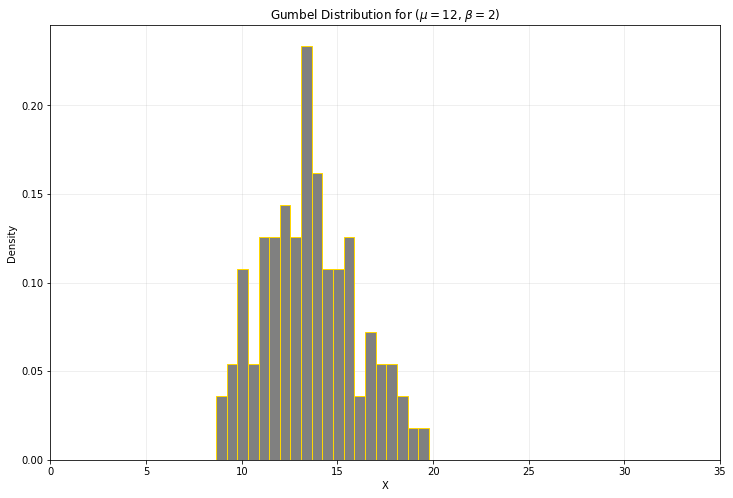

In [134]:
mu = 12
beta = 2
n_sample = 100
x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n_sample)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.hist(x, color="grey",edgecolor="gold", bins=20, density=True)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.set_title(r'Gumbel Distribution for ($\mu=${}, $\beta=${})'.format(mu,beta))
plt.xlim([0,35])
plt.show()

**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=12$ and $\beta=3$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. 

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 99% confidence interval for the mean.

In [101]:
mean = 12 + 3*np.euler_gamma
var = ((np.pi**2)/6)*(3**2)
z = stats.norm.ppf(0.975)
lower = x.mean() - z*np.sqrt(var)/np.sqrt(len(x))
upper = x.mean() + z*np.sqrt(var)/np.sqrt(len(x))

print(f"Mean: {mean}\nVariance: {var}\nZ: [{z}]\nCI: [{lower},{upper}]")

Mean: 13.7316469947046
Variance: 14.804406601634037
Z: [1.959963984540054]
CI: [12.207086865770735,13.715337751067866]


$mean = \mu + \beta\gamma \approx 13.73$

$var = \frac{\pi^2}{6}\beta^2 \approx 6.58$

$CI = 13.73 \pm 1.96\frac{\sqrt{6.58}}{\sqrt{len(n)}} = 12.46, 13.46$

**Part C:  A theoretical interlude.** When Stella O'Flaherty (the famous octopus) ran her solution code for **Part B**, she obtained a 99% confidence interval of $[12.73,  14.72]$ for the mean of the $Gum(\mu=12, \beta=3)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 99% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=12, \beta=3)$ distribution, you could say there is a 99% chance that its true mean falls between 12.73 and 14.72.

**(ii)** If a class of 100 students all construct 99% confidence intervals for the mean of the $Gum(\mu=12, \beta=3)$ distribution, then we expect about 99 of their CIs to contain the true mean, and about 1 of them to miss the true mean.

**(iii)** There is a 99% probability that any given random variable sampled from $Gum(\mu=12, \beta=3)$ will be between 12.73 and 14.72.

***ANSWER***

**(i)** False, the confidence interval of 99% is just the interval that 99% of the means from a samples would fall on.

**(ii)** True, the 99% confidence interval means that 99% of the class's CI's would contain the true mean.

**(iii)** False, random variables have nothing to do with the confidence interval.

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=12$ and $\beta=3$.  For each random sample, compute the 75% confidence interval for the mean. Note that you actually know that the variance for the true population distribution is, $\sigma^2$.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals black if they cover the true mean, and red if they don't.  

Be sure to leave this cell executed before turning in your assignment!

fraction covering mean:  0.742


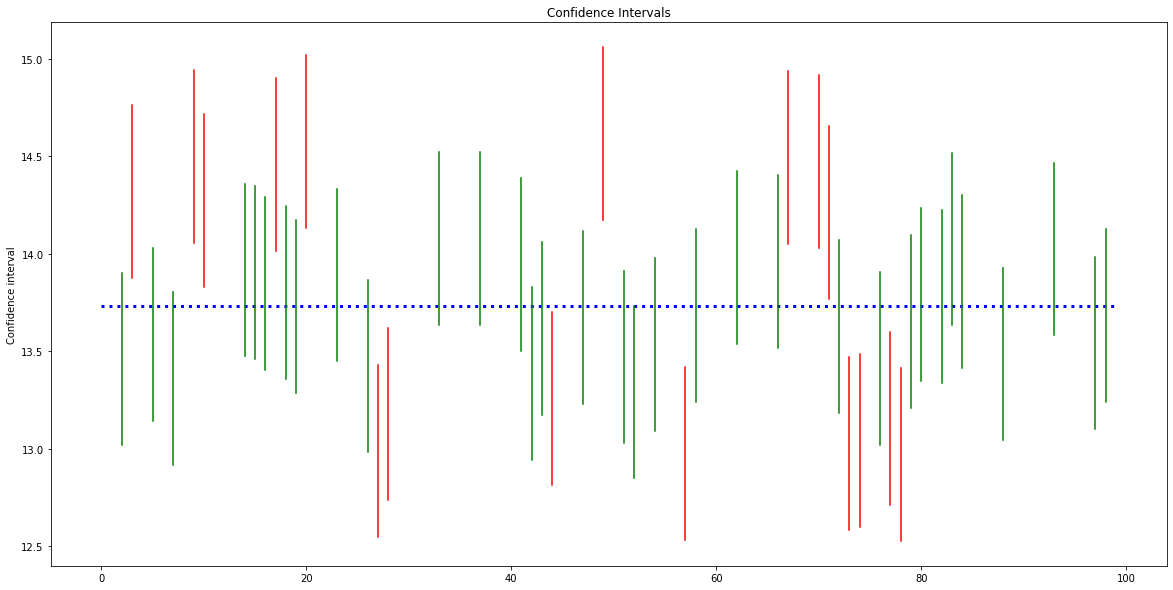

In [144]:
def confidence_intervals(m=500, n=100):
    covers = 0
    list_ints = []
    z = stats.norm.ppf(7/8)
    mu = 12
    beta = 3
    var = (np.pi**2/6)*(beta**2)
    trueMean = mu + beta*np.euler_gamma
    for i in range(m):
        r = stats.gumbel_r.rvs(loc = mu, scale = beta, size = n)
        lower = r.mean() - z*np.sqrt(var)/np.sqrt(n)
        upper = r.mean() + z*np.sqrt(var)/np.sqrt(n)
        list_ints.append((lower, upper))
        if trueMean >= lower and trueMean <= upper:
            covers += 1
    cover_int = []
    uncover_int = []
    fraction_covering_mean = covers/m
    all_indices = [i for i in range(len(list_ints))]
    samples = np.random.choice(all_indices, 50, replace = False)
    
    for index in samples:
        lower, upper = list_ints[index]
        if trueMean <= upper and trueMean >= lower:
            cover_int.append(list_ints[index])
        else:
            uncover_int.append(list_ints[index])
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    sId = [i for i in range(100)]
    ax.plot([0,99], [trueMean, trueMean], color="blue", ls=':', lw=3)
    for interval in uncover_int:
        lower, upper = interval
        random_index = np.random.randint(0, len(sId))
        ax.plot([sId[random_index], sId[random_index]],[lower, upper], color = 'red')
        sId.pop(random_index)
    for interval in cover_int:
        lower, upper = interval
        random_index = np.random.randint(0, len(sId))
        ax.plot([sId[random_index], sId[random_index]],[lower, upper], color = 'green')
        sId.pop(random_index)
    ax.set_title("Confidence Intervals")
    ax.set_ylabel("Confidence interval")
    print("fraction covering mean: ",fraction_covering_mean)
    
    
confidence_intervals()

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

It does agree with what we discussed in class - 74.2% of the confidence intervals selected cover the mean of the data, and the confidence interval is 75%.

---

<a id='p4'></a>
[Back to top](#top)

### [15 points] Problem 4 - Freethrow Throwbacks
***

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>Your Michael Jordan in his prime...It's the sixth game of the 1998 NBA Finals and Byron Russel fouls you, but when you step up to take the freethrow, your transported to a CSCI 3022 classroom. Solve the following to "make" the freethrow:</font>

You have a shuffled deck of cards. It includes the usual 52 cards and 2 Jokers. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip four of the following five cards: the six of hearts, the eight of diamonds, the king of clubs, and both of the jokers.  You repeat this many times. 

Simulate this process at least 25000 times. Plot a histogram with binsize=1 of the outcomes, in lightgrey with white outline. Compute the mean, median, and mode for this dataset, indicate them on the plot using a line, with linstyles of green dashed, red dotted, and black solid, respectively. Use a legend to label your histogram (of the distribution of flips), mean, median. Does this data look positively or negatively skewed? Explain below in a markdown cell, talk about the mean, median, and the shape of the histogram in your answer.

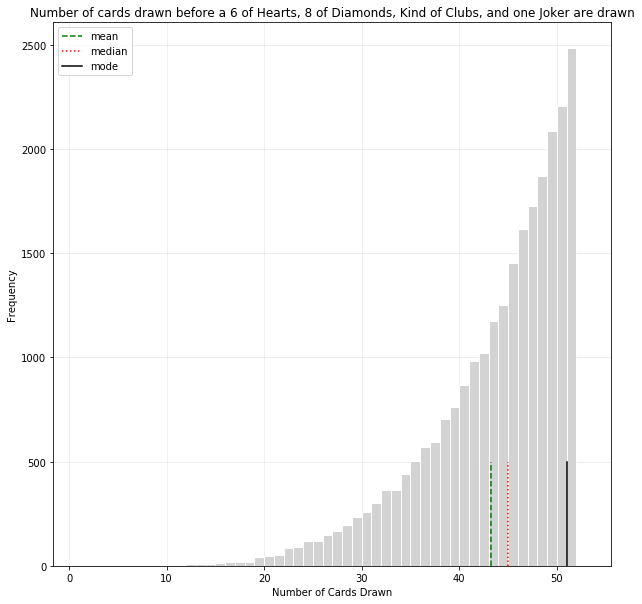

In [143]:
from random import shuffle

class Deck:
    def __init__(self):
        self.cards = []
        for i in range(47):
            self.cards.append('Usual')
        for i in range(2):
            self.cards.append('Joker')
        self.cards.append('6 of Hearts')
        self.cards.append('8 of Diamonds')
        self.cards.append('King of Clubs')
        shuffle(self.cards)
        
    #function to draw cards
    def draw(self):
        return self.cards.pop()

def simulateCardDraws(n):
    numDrawn = []
    targets = ['Joker', '6 of Hearts', '8 of Diamonds', 'King of Clubs']
    for i in range(n):
        targetsDrawn = 0
        d = Deck()
        cards_drawn = 0
        while targetsDrawn < 5:
            drawn = d.draw()
            cards_drawn += 1
            if(drawn in targets):
                targetsDrawn += 1
        numDrawn.append(cards_drawn - 1)
    return numDrawn

cdDf = pd.Series(simulateCardDraws(25000))
mean = cdDf.mean()
median = cdDf.median()
mode = cdDf.mode()
fig, ax = plt.subplots(1,1,figsize=(10,10))
cdDf.hist(ax = ax, 
          bins = range(1, 54),
           facecolor='lightgray',
         edgecolor = 'white')
plt.plot([mean, mean],[1, len(cdDf)/50], color = 'green', linestyle = '--', label="mean")
plt.plot([median, median],[1,len(cdDf)/50], color = 'red', linestyle = ':', label="median")
plt.plot([mode, mode],[1, len(cdDf)/50], color = 'black', label = "mode")
ax.grid(alpha = 0.25)
ax.set_axisbelow(True)
ax.set_title("Number of cards drawn before a 6 of Hearts, 8 of Diamonds, Kind of Clubs, and one Joker are drawn")
ax.set_xlabel("Number of Cards Drawn")
ax.set_ylabel("Frequency")
plt.legend()

Based off the histogram, the data is clearly negatively skewed. Even if we hadn't plotted the frequency of number of cards drawn of each seprate simulation, the mean, median, and mode would tell us that the data is negatively skewed because mean < median < mode.

***

**Part B**: <font color='green'> Now you're back up for another freethrow, but this time you've been transported to the third overtime of the famous [1976 NBA Finals Game Five](https://www.youtube.com/watch?v=3ZjNDvuMxzc). You line up for a freethrow, but oddly enough you're again transported back to CSCI 3022... Why does this keep happening? If you solve this problem, you make the freethrow:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?

A confidence interval of 99% is generally wider than that of 95%, because when we have a higher percentage of confidence, as in "I am 99% sure" vs "I am 95% sure", there is a larger possibility that the sample data will fall in that interval.

***

**Part C**: <font color='green'>The crowd is silent... Because there is no crowd... And it's not a basketball game...  You're Will Smith and it's 1998. You've got an important decision to make: You've been offered the lead role in both a sci-fi flick and a steampunk western action comedy. If you make this "freethrow", Will Smith takes the sci-fi role and stars in "The Matrix" as Neo. If you fail to solve this question, Will Smith makes the blunder of turning down the "Matrix" to appear in "Wild Wild West" and history remains unchanged.
</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **smith**, below. These represent the probabilities of him taking the role in the matrix, calculated by differant "statistical measures". Compute a 95% confidence interval for the _variance_.


In [86]:
smith = np.array([0.67832,0.113,0.423,0.279,0.580,0.401,0.189, 0.198, 0.147, 0.103, 0.098])

def confInterval(M, dataList):
    resamples = [np.random.choice(dataList, replace = True, size = len(dataList)) for i in range(M)]
    stds = [np.var(one_resample) for one_resample in resamples]
    return (np.percentile(stds, 2.5), np.percentile(stds, 97.5))

print(confInterval(25000, smith))

(0.00922414876033058, 0.05678742682842976)



***

**Part D**: <font color='green'>Now we're back to basketball...You're Askia Booker, former CU point guard. It's the [2013 KU game](https://www.youtube.com/watch?v=-ycTB27RlEc) and your take the ball with 2.7 seconds left. To sink the three and win the game, solve the following: </font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.


We would prefer to have a low Type II error. A type II error would mean that the research showed that the carbon was at the right tolerance, when it was actually below tolerance. A type I error is the opposite, meaning we would be safe, although the research would show that we wouldn't be safe.


***

**Part E**: <font color='green'>Well, we haven't stopped time traveling yet.... But now we're in the soccor world. Your a striker in the [1994 Fifa World Cup Final](https://www.youtube.com/watch?v=pLPM_JSbGvI) between Brazil and Italy. Solve this problem to make a penalaty kick during the final shootout:</font>

You measure 49 suckers from baby reef octopuses and find that they are, on average, 47.2 mm wide, with a standard devaition of 29.2mm. 

Then you measure 65 suckers from from baby dumbo octopuses and find that they are, on average, 63.9 mm wide, with a standard deviation of 19.6 mm. 

Is there statistical evidence at the 0.025 significance level that the true mean of baby dumbo octopus sucker width exceeds the true mean of baby reef octopus sucker width by more than 7 mm?  Use a test of your choice.

$H_0: \mu_{dumbo} - \mu_{reef} = 7$

$H_1: \mu_{dumbo} - \mu_{reef} > 7$

$Z=\frac{\left(\mu_{dumbo} - \mu_{reef}\right) - 7}{\sqrt{\frac{\sigma_{dumbo}^2}{n_{dumbo}}+\frac{\sigma_{reef}^2}{n_{reef}}}} = 2.009$

$p-v = 1-\Phi(Z) = 0.022$

$0.022 < significance$

No, there is no statistical evidence of this matter.

In [93]:
mureef = 47.2
sigmareef = 29.2
nreef = 49
mudumbo = 63.9
sigmadumbo = 19.6
ndumbo = 65

z = ((mudumbo - mureef) - 7)/(np.sqrt((sigmadumbo**2/ndumbo)+(sigmareef**2/nreef)))
print(z)
p = 1 - stats.norm.cdf(z)
print(p)

2.009053768311491
0.02226571592072224
